<a href="https://colab.research.google.com/github/Sreemaee21/SpeechProcessing/blob/main/BERTonAGNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub

In [ ]:
(train_data, val_data), info = tfds.load('ag_news_subset:1.0.0', #version 1.0.0
                                         split=['train[:90%]', 'train[90%:]+test'],
                                         with_info=True,
                                         as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/120000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/1.0.0.incompleteQOKM25/ag_news_subset-train.tfrecord*...:  …

Generating test examples...:   0%|          | 0/7600 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/1.0.0.incompleteQOKM25/ag_news_subset-test.tfrecord*...:   …

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='ag_news_subset',
    full_name='ag_news_subset/1.0.0',
    description="""
    AG is a collection of more than 1 million news articles. News articles have been
    gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of
    activity. ComeToMyHead is an academic news search engine which has been running
    since July, 2004. The dataset is provided by the academic comunity for research
    purposes in data mining (clustering, classification, etc), information retrieval
    (ranking, search, etc), xml, data compression, data streaming, and any other
    non-commercial activity. For more information, please refer to the link
    http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .
    
    The AG's news topic classification dataset is constructed by Xiang Zhang
    (xiang.zhang@nyu.edu) from the dataset above. It is used as a text
    classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann
    LeCu

In [ ]:
# Displaying the classes

class_names = info.features['label'].names
num_classes = info.features['label'].num_classes

print(f'The news are grouped into {num_classes} classes that are :{class_names}')

The news are grouped into 4 classes that are :['World', 'Sports', 'Business', 'Sci/Tech']


In [ ]:
num_train = info.splits['train'].num_examples
num_val = info.splits['test'].num_examples

print(f'The number of training samples: {num_train} \nThe number of validation samples: {num_val}')


The number of training samples: 120000 
The number of validation samples: 7600


In [ ]:
buffer_size = 1000
batch_size = 32

train_data = train_data.shuffle(buffer_size)
train_data = train_data.batch(batch_size).prefetch(1)
val_data = val_data.batch(batch_size).prefetch(1)

In [ ]:
!pip install tensorflow_text
import tensorflow_text as text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 33.2 MB/s eta 0:00:00


In [ ]:
bert_handle = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/2'
preprocessing_model = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [ ]:
preprocess_layer = hub.KerasLayer(preprocessing_model)

In [ ]:
sample_news = ['Tech rumors: The tech giant Apple is working on its self driving car']

preprocessed_news = preprocess_layer(sample_news)

print(f'Keys       : {list(preprocessed_news.keys())}')
print(f'Shape      : {preprocessed_news["input_word_ids"].shape}')
print(f'Word Ids   : {preprocessed_news["input_word_ids"][0, :5]}')
print(f'Input Mask : {preprocessed_news["input_mask"][0, :5]}')
print(f'Type Ids   : {preprocessed_news["input_type_ids"][0, :5]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101  6627 11256  1024  1996]
Input Mask : [1 1 1 1 1]
Type Ids   : [0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(bert_handle)

In [ ]:
bert_outputs = bert_model(preprocessed_news)

print(f'Pooled output shape:{bert_outputs["pooled_output"].shape}')
print(f'Pooled output values:{bert_outputs["pooled_output"][0, :5]}')
print(f'Sequence output shape:{bert_outputs["sequence_output"].shape}')
print(f'Sequence output values:{bert_outputs["sequence_output"][0, :5]}')

Pooled output shape:(1, 512)
Pooled output values:[ 0.9445978   0.9861868  -0.15102875  0.17372076 -0.64245623]
Sequence output shape:(1, 128, 512)
Sequence output values:[[-0.60826164  0.26230305  1.2436793  ... -0.88217264  0.36095393
  -0.00184689]
 [ 0.33820498  0.07993765  1.1374027  ... -1.643891   -1.0649078
  -0.73716927]
 [-0.60549146 -0.14994538  0.8464852  ... -0.74730515  0.8475889
   0.13153368]
 [ 0.06869027  0.6969761   1.5265325  ... -0.768091   -0.30986038
   0.2501719 ]
 [-1.2314897   1.4334058  -0.377469   ... -1.3110949  -0.01984622
   0.79048693]]


In [ ]:
Val_accuracy = train_accuracy{.2%}

## classifier w BERT


In [ ]:
input_text = tf.keras.layers.Input(shape=(), dtype=tf.string, name='Input')

# A preprocesing model before layer BERT
preprocessing_layer = hub.KerasLayer(preprocessing_model, name='preprocessing_layer')

bert_input = preprocessing_layer(input_text)

# Getting a Bert model, set trainable to True
bert_encoder = hub.KerasLayer(bert_handle, trainable=True, name='bert_encoder')

bert_outputs = bert_encoder(bert_input)

# For finetuning, we take pooled_output
pooled_bert_output = bert_outputs['pooled_output']

# Adding a dense layer

dense_net = tf.keras.layers.Dense(16, activation='relu', name='fully_connected_layer')(pooled_bert_output)
# Add dropout layer for regularization
dense_net = tf.keras.layers.Dropout(0.2)(dense_net)

# Last dense layer for classification purpose
final_output = tf.keras.layers.Dense(4, activation='softmax', name='classifier')(dense_net)

# Combine input and output

news_classifier = tf.keras.Model(input_text, final_output)

In [ ]:
news_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None,)]                    0         []                            
                                                                                                  
 preprocessing_layer (Keras  {'input_word_ids': (None,    0         ['Input[0][0]']               
 Layer)                      128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

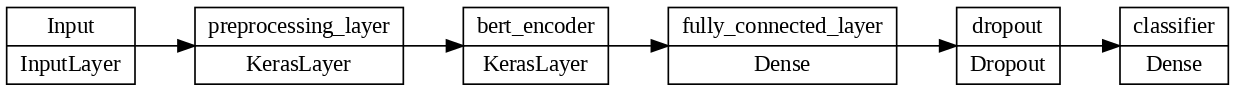

In [ ]:

tf.keras.utils.plot_model(news_classifier, rankdir='LR', dpi=120)

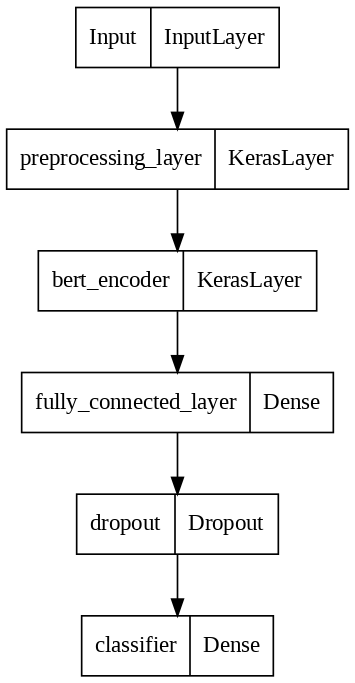

In [ ]:

tf.keras.utils.plot_model(news_classifier, rankdir='TB', dpi=120)

In [ ]:
news_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [ ]:
# Train the model

batch_size = 32

train_steps = int(len(train_data)/batch_size)
val_steps = int(len(val_data)/batch_size)

history = news_classifier.fit(train_data,
                    epochs=15,
                    validation_data=val_data,
                    steps_per_epoch=train_steps,
                    validation_steps=val_steps
)

Epoch 1/15
105/105 [==============================] - 963s 9s/step - loss: 0.6934 - accuracy: 0.7339 - val_loss: 0.3611 - val_accuracy: 0.8832
Epoch 2/15
105/105 [==============================] - 932s 9s/step - loss: 0.5004 - accuracy: 0.8271 - val_loss: 0.3195 - val_accuracy: 0.9013
Epoch 3/15
105/105 [==============================] - 843s 8s/step - loss: 0.4231 - accuracy: 0.8571 - val_loss: 0.2852 - val_accuracy: 0.9095
Epoch 4/15
105/105 [==============================] - 863s 8s/step - loss: 0.4033 - accuracy: 0.8685 - val_loss: 0.2676 - val_accuracy: 0.9128
Epoch 5/15
105/105 [==============================] - 851s 8s/step - loss: 0.3983 - accuracy: 0.8676 - val_loss: 0.2836 - val_accuracy: 0.9145
Epoch 6/15
105/105 [==============================] - 910s 9s/step - loss: 0.3911 - accuracy: 0.8720 - val_loss: 0.2602 - val_accuracy: 0.9227
Epoch 7/15
105/105 [==============================] - 950s 9s/step - loss: 0.3478 - accuracy: 0.8854 - val_loss: 0.2678 - val_accuracy: 0.9145

In [ ]:
# function to plot accuracy and loss

def plot_acc_loss(history):

  model_history = history.history
  acc = model_history['accuracy']
  val_acc = model_history['val_accuracy']
  loss = model_history['loss']
  val_loss = model_history['val_loss']
  epochs = history.epoch

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

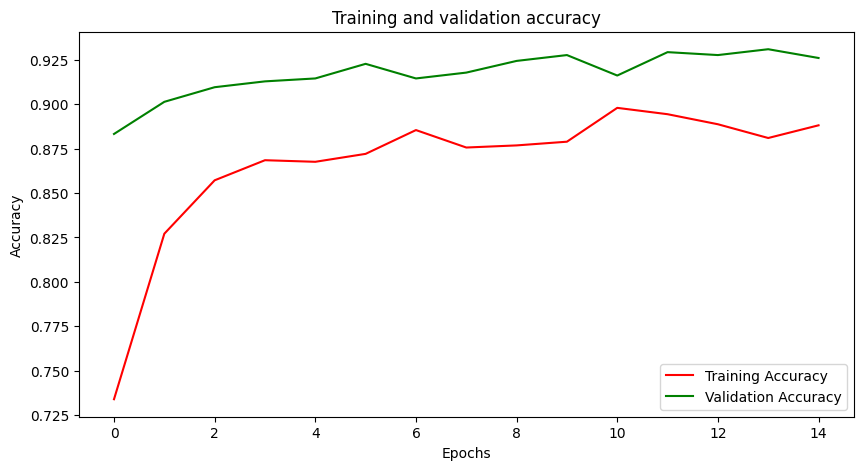

<Figure size 640x480 with 0 Axes>

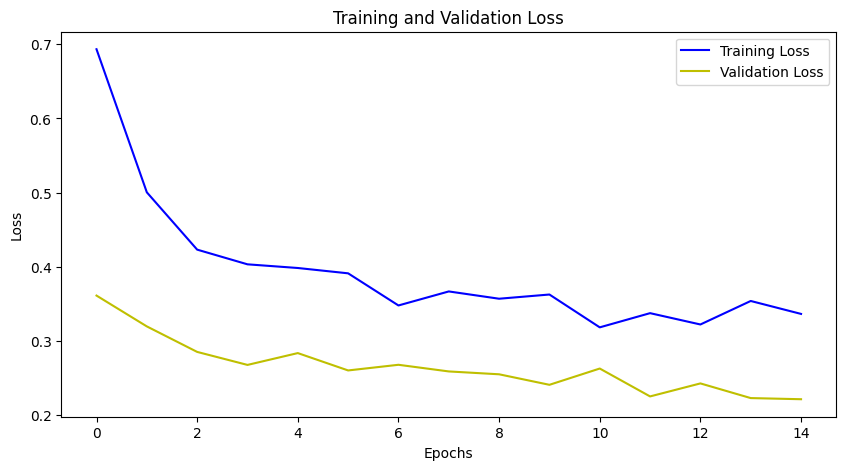

In [ ]:
plot_acc_loss(history)

In [ ]:
def predict(model, sample_news, class_names):

  # Convert sample news into array

  sample_news = np.array(sample_news)

  # Predict the news type

  preds = model.predict(sample_news)

  pred_class = np.argmax(preds[0])

  print(f'predicted class: {pred_class} \nPredicted Class name: {class_names[pred_class]}')

In [ ]:
plot_acc_loss(history)

In [ ]:
def predict(model, sample_news, class_name):
